<center><font color='green' size='20'>Examen Primer Parcial</font></center>

<center><font size='5' color='Yellow'>Grande </font><font size='5' color='blue'>la </font><font size='5' color='red'>tri</font></center>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats
pd.options.mode.chained_assignment = None

In [2]:
df_ene = pd.read_csv(
    '../Data/sales_2017_enero.csv',
    parse_dates=['date'],
)

df_feb = pd.read_csv(
    '../Data/sales_2017_febrero.csv',
    parse_dates=['date'],
)

df_mar = pd.read_csv(
    '../Data/sales_2017_marzo.csv',
    parse_dates=['date'],
)

df_oil = pd.read_csv(
    '../Data/oil.csv',
    parse_dates=['date'],
)

df_stores = pd.read_csv(
    '../Data/stores.csv',

)

1. <font color='green'>Imputar los precios del barril de petróleo por año (2015, 2016, 2017), es decir, por cada año realice una imputación con la media del precio del barril de petróleo. Crear un line plot para visualizar la evolución del precio del petróleo, por cada año se debe crear una línea en el line plot que muestre la evolución del precio del petróleo durante los meses del año; es decir, un lineplot con 3 líneas (una por cada año). Asegúrese de agregar estilos y colores a cada línea, y crear una leyenda para el lineplot. Escriba un breve análisis de los resultados que se reflejan. (El análisis se debe escribir en comentarios) (20 puntos)</font>

In [3]:
oil_2015 = df_oil[df_oil['date'].dt.year == 2015]
oil_2016 = df_oil[df_oil['date'].dt.year == 2016]
oil_2017 = df_oil[df_oil['date'].dt.year == 2017]

In [4]:
oil_2015['dcoilwtico'].fillna(oil_2015['dcoilwtico'].mean(), inplace=True)
oil_2016['dcoilwtico'].fillna(oil_2016['dcoilwtico'].mean(), inplace=True)
oil_2017['dcoilwtico'].fillna(oil_2017['dcoilwtico'].mean(), inplace=True)

In [5]:
plot_oil_2015 = oil_2015.groupby(pd.Grouper(key='date', freq='M'))['dcoilwtico'].mean().reset_index()
plot_oil_2016 = oil_2016.groupby(pd.Grouper(key='date', freq='M'))['dcoilwtico'].mean().reset_index()
plot_oil_2017 = oil_2017.groupby(pd.Grouper(key='date', freq='M'))['dcoilwtico'].mean().reset_index()

Text(0.5, 1.0, 'Precio del barril de petroleo en los meses de los años 2015, 2016 y 2017')

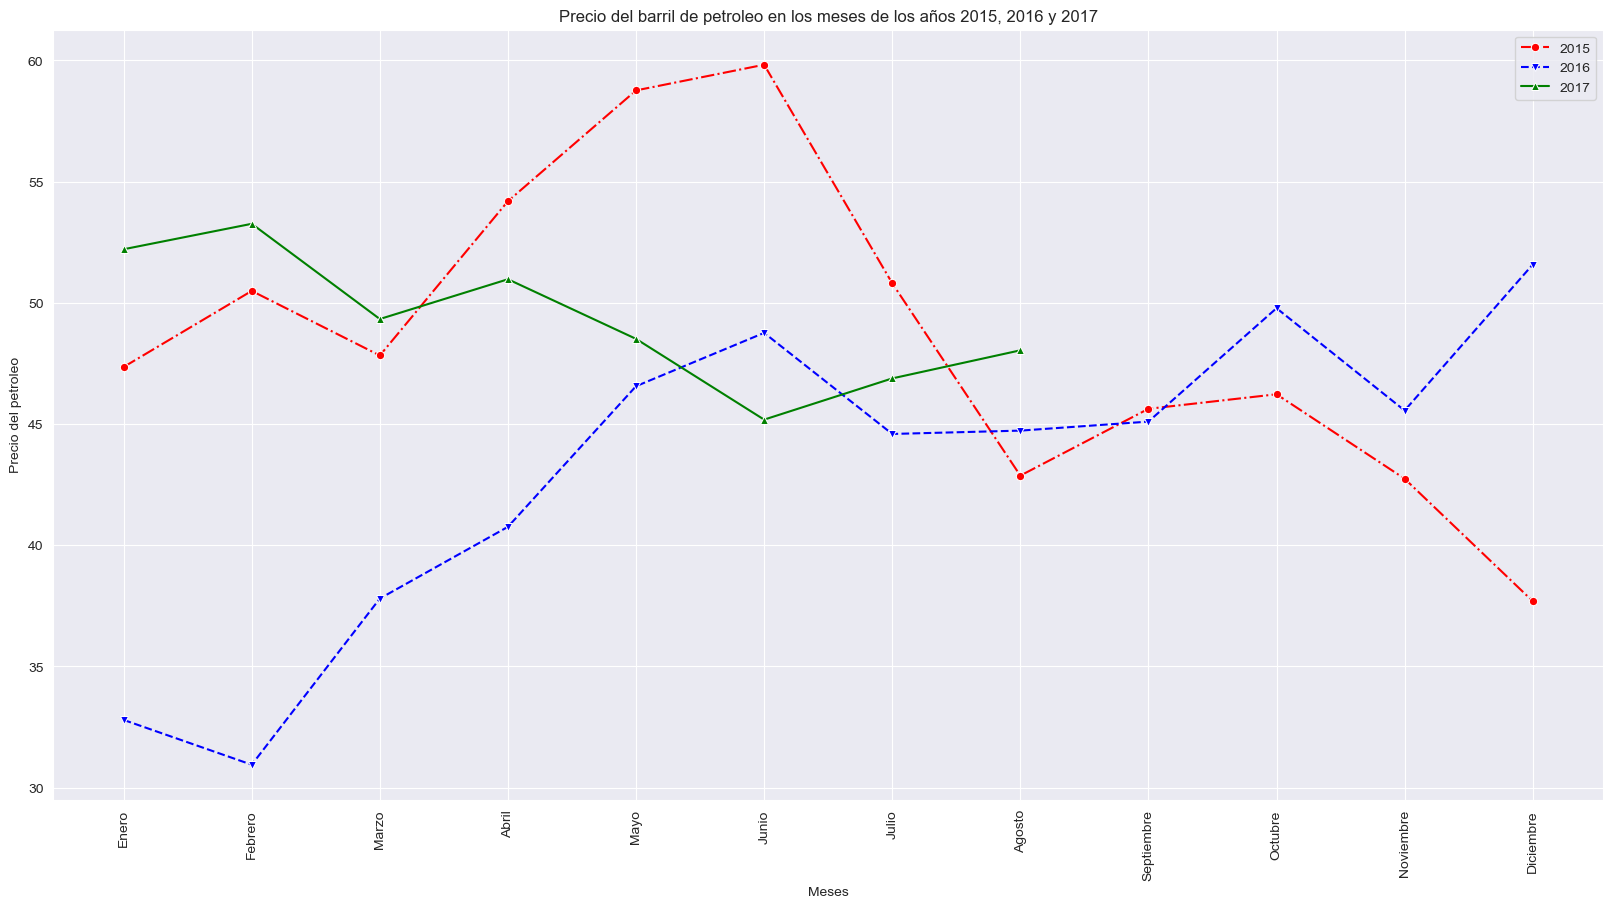

In [6]:
sbn.set_style('darkgrid')
fig,axs = plt.subplots(figsize=(20, 10))
sbn.lineplot(data= plot_oil_2015, x = plot_oil_2015['date'].dt.month, y = 'dcoilwtico', color='r', marker='o', ax=axs, linestyle='-.', label='2015')
sbn.lineplot(data= plot_oil_2016, x = plot_oil_2016['date'].dt.month, y = 'dcoilwtico', color='b', marker='v', ax=axs, linestyle='--', label='2016')
sbn.lineplot(data= plot_oil_2017, x = plot_oil_2017['date'].dt.month, y = 'dcoilwtico', color='g', marker='^', ax=axs, linestyle='-', label='2017')
_ = plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=90)
axs.set_xlabel('Meses')
axs.set_ylabel('Precio del petroleo')
axs.set_title('Precio del barril de petroleo en los meses de los años 2015, 2016 y 2017')

<font color='orange' size='5'>Análisis</font>

Se aprecia que el precio del barril de petróleo ha tenido un comportamiento volatil en los tres años. En el 2015 se visualiza un pico máximo en junio mientras que sufrió una caída al final del año. En 2016 se aprecia un crecimiento constante, alcanzando su máximo valor en diciembre teniendo en cuenta que empezo el año con un valor bastante bajo. En 2017 ocurre lo contrario al año anterior, se ve una decaída conforme pasan los meses.

2. <font color='green'>Calcular el zscore del precio del barril del petróleo por cada año (2015, 2016, 2017). Crear un distplot con tres distribuciones (un solo distplot con tres distribuciones), uno por cada año. Escriba un breve análisis de los resultados que se reflejan. (El análisis se debe escribir en comentarios) (25 puntos)</font>


In [7]:
zscore_oil_2015 = stats.zscore(oil_2015['dcoilwtico'])
zscore_oil_2016 = stats.zscore(oil_2016['dcoilwtico'])
zscore_oil_2017 = stats.zscore(oil_2017['dcoilwtico'])

Text(0.5, 1.0, 'Zscore del precio del barril en los años 2015, 2016 y 2017')

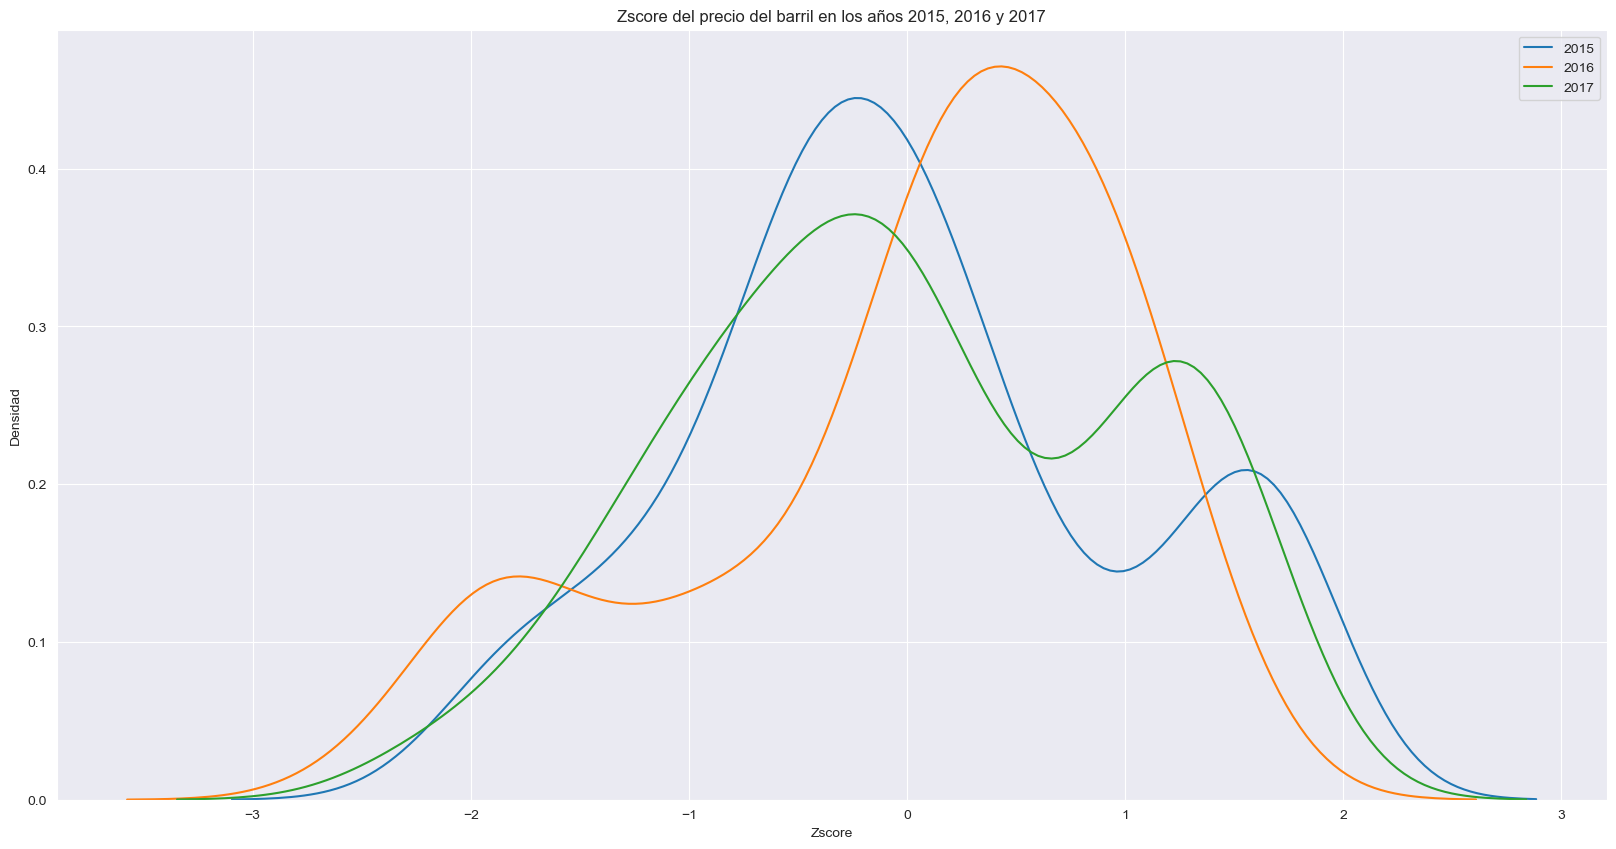

In [8]:
sbn.set_style('darkgrid')
fig,axs = plt.subplots(figsize=(20,10))
sbn.distplot(zscore_oil_2015, hist=False, label='2015', kde=True)
sbn.distplot(zscore_oil_2016, hist=False, label='2016', kde=True)
sbn.distplot(zscore_oil_2017, hist=False, label='2017', kde=True)
plt.legend()
axs.set_xlabel('Zscore')
axs.set_ylabel('Densidad')
axs.set_title('Zscore del precio del barril en los años 2015, 2016 y 2017')

<font color='orange' size='5'>Análisis</font>

Se puede apreciar que en los tres años el precio del barril de petróleo presenta una distribución no normal. En 2015 la distribucion es más simétrica aun así se aprecia una cola a la derecha, lo mismo se da en el año 2017, pero en 2016 se aprecia una cola a la izquierda.

3. <font color='green'>Crear un faceted plot que tenga tres box plots de la data del precio del petróleo, uno por cada año (2015, 2016, 2017). Escriba un breve análisis de los resultados que se reflejan. (El análisis se debe escribir en comentarios) (20 puntos)</font>

(25.0, 65.0)

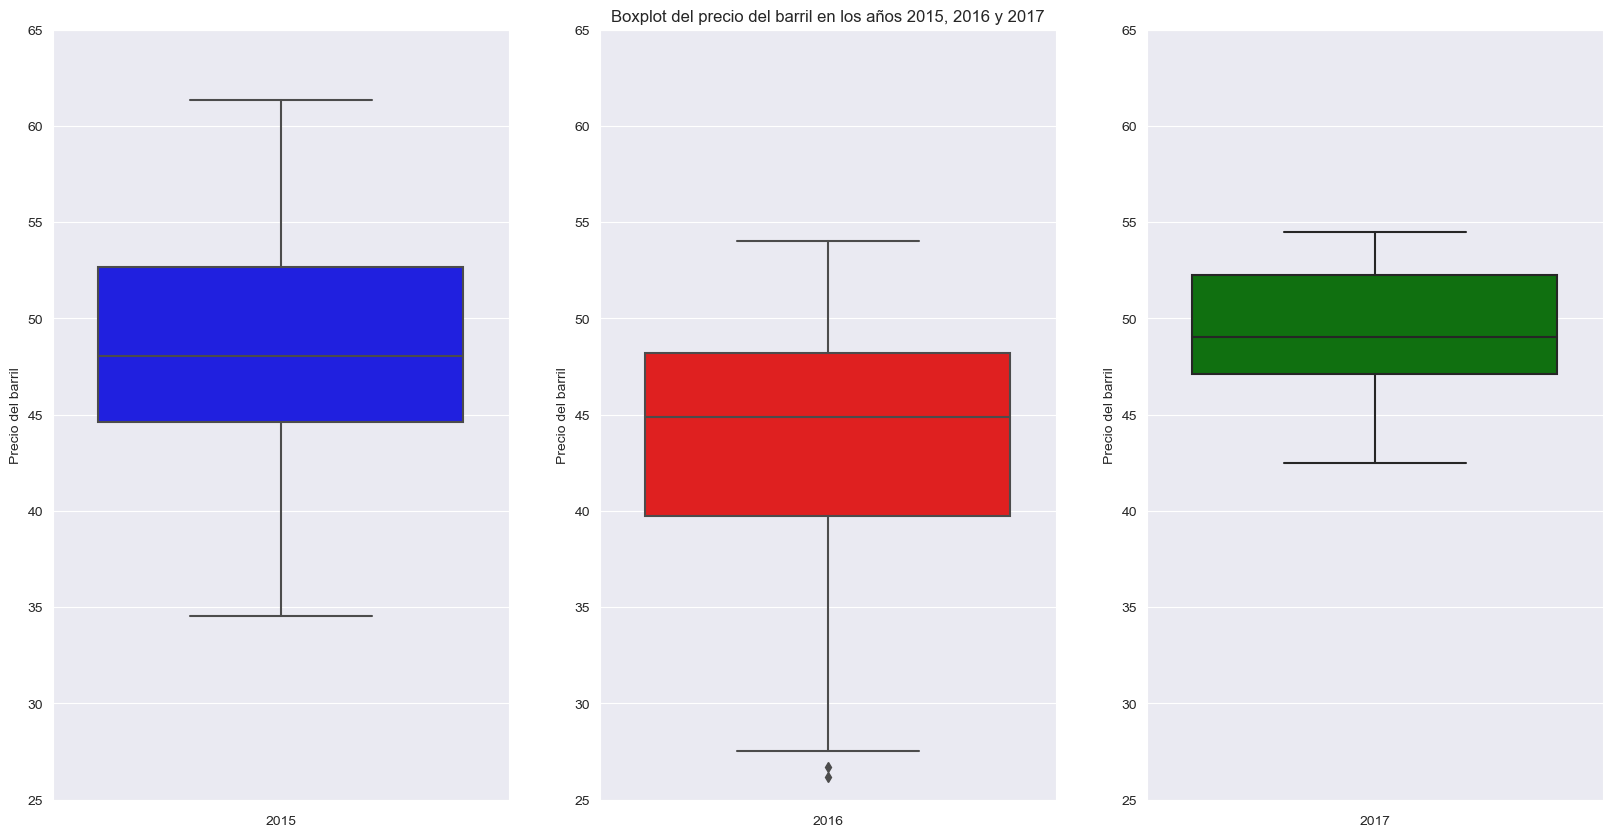

In [32]:
sbn.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(20, 10))
sbn.boxplot(y=oil_2015['dcoilwtico'], ax=axs[0], color='b')
sbn.boxplot(y=oil_2016['dcoilwtico'], ax=axs[1], color='r')
sbn.boxplot(y=oil_2017['dcoilwtico'], ax=axs[2], color='g')
axs[0].set_ylabel('Precio del barril')
axs[0].set_xlabel('2015')
axs[1].set_ylabel('Precio del barril')
axs[1].set_xlabel('2016')
axs[2].set_ylabel('Precio del barril')
axs[2].set_xlabel('2017')
axs[1].set_title('Boxplot del precio del barril en los años 2015, 2016 y 2017')
axs[0].set_ylim(25, 65)
axs[1].set_ylim(25, 65)
axs[2].set_ylim(25, 65)

<font color='orange' size='5'>Análisis</font>

Para empezar, a simple vista podemos decir que la media del precio del barril de petroleo es mayor en el 2017 mientras que la menor se da en el 2016. Sin embargo, se aprecia que en el 2015 se alcanzan valores más altos en el precio en comparación con el 2017. Algo curioso es que la media del precio en el 2016 está a la par con el menor valor visto en el 2015.

4. <font color='green'>Elaborar un faceted plot que tenga tres heatmaps, uno por cada mes (enero, febrero, marzo). Cada heatmap debe tener como filas los días de la semana, y las columnas debe tener todas las provincias del Ecuador (sin Guayaquil y Quito). Las celdas del heatmap debe tener la cantidad de transacciones. Escriba un breve análisis de los resultados que se reflejan. (El análisis se debe escribir en comentarios) (35 puntos)</font>

In [10]:
df_stores = df_stores[(df_stores['city'] != 'Guayaquil') & (df_stores['city'] != 'Quito')]

In [11]:
df_ene_hm = df_ene.merge(df_stores, on='store_nbr', how='inner')
df_feb_hm = df_feb.merge(df_stores, on='store_nbr', how='inner')
df_mar_hm = df_mar.merge(df_stores, on='store_nbr', how='inner')

In [12]:
def categorizar(row):
    if row['date'].dayofweek == 0:
        return 'Lunes'
    elif row['date'].dayofweek == 1:
        return 'Martes'
    elif row['date'].dayofweek == 2:
        return 'Miercoles'
    elif row['date'].dayofweek == 3:
        return 'Jueves'
    elif row['date'].dayofweek == 4:
        return 'Viernes'
    elif row['date'].dayofweek == 5:
        return 'Sabado'
    elif row['date'].dayofweek == 6:
        return 'Domingo'

In [13]:
df_ene_hm['day'] = df_ene_hm.apply(categorizar, axis=1, result_type='expand')
dfht_ene =pd.pivot_table(data=df_ene_hm, index='day', columns='state', values='unit_sales', aggfunc='sum')
df_feb_hm['day'] = df_feb_hm.apply(categorizar, axis=1, result_type='expand')
dfht_feb =pd.pivot_table(data=df_feb_hm, index='day', columns='state', values='unit_sales', aggfunc='sum')
df_mar_hm['day'] = df_mar_hm.apply(categorizar, axis=1, result_type='expand')
dfht_mar =pd.pivot_table(data=df_mar_hm, index='day', columns='state', values='unit_sales', aggfunc='sum')

Text(0.5, 1.0, 'Ventas por provincia y dia de la semana en los meses de Enero, Febrero y Marzo')

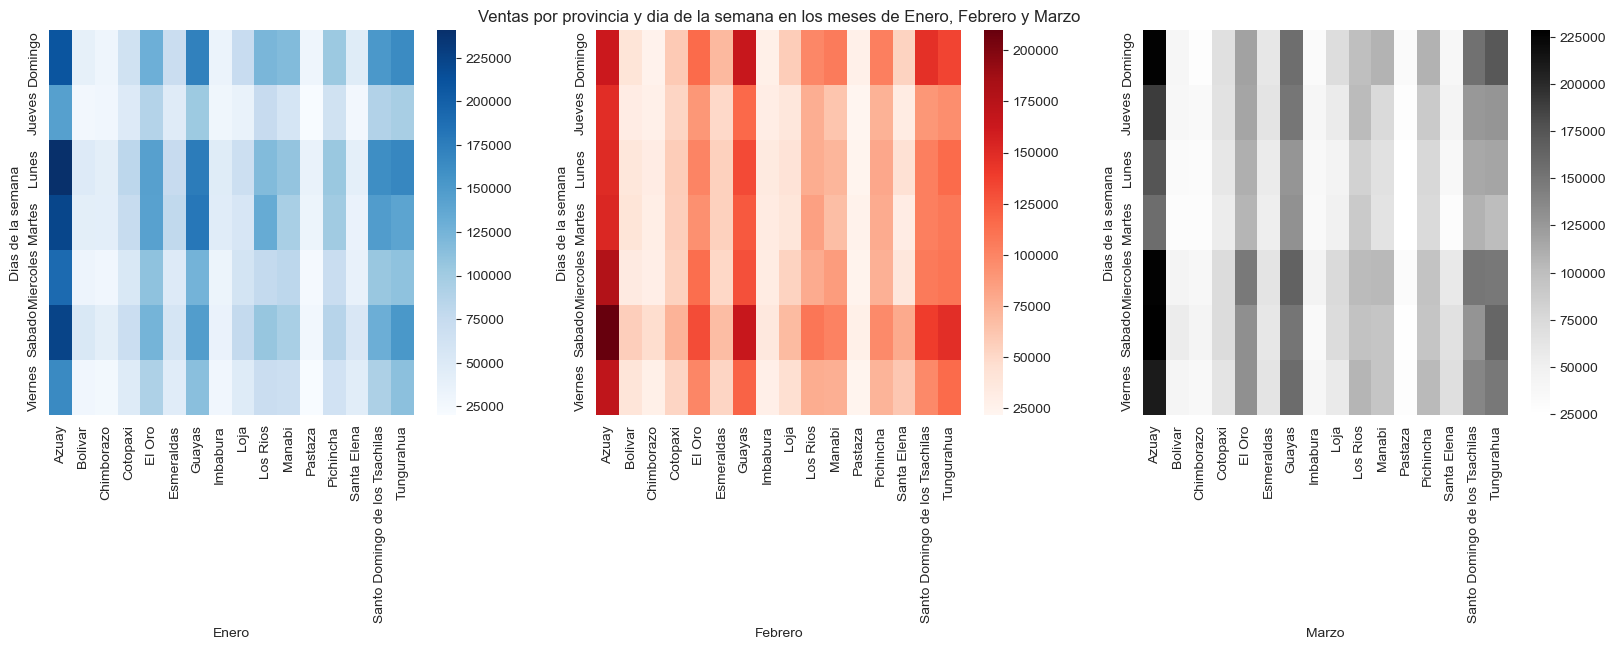

In [33]:
sbn.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(20,5))
sbn.heatmap(dfht_ene, ax=axs[0], cmap='Blues')
sbn.heatmap(dfht_feb, ax=axs[1], cmap='Reds')
sbn.heatmap(dfht_mar, ax=axs[2], cmap='Greys')
axs[0].set_ylabel('Dias de la semana')
axs[0].set_xlabel('Enero')
axs[1].set_ylabel('Dias de la semana')
axs[1].set_xlabel('Febrero')
axs[2].set_ylabel('Dias de la semana')
axs[2].set_xlabel('Marzo')
axs[1].set_title('Ventas por provincia y dia de la semana en los meses de Enero, Febrero y Marzo')

<font color='orange' size='5'>Análisis</font>

En el mes de enero se aprecia que el dia con mayores ventas es el lunes mientas que el menor seria el jueves. En febrero se aprecia que el dia con mayores ventas es el Sabado mientras que el menor seria nuevamente el jueves. En marzo se aprecia que el dia con mayores ventas es el miercoles mientras que el menor seria el martes. Algo curioso a destacar es el hecho de que en Azuay es donde se produce la mayor cantidad de ventas seguido de Guayas que recordemos que se no se tomo en cuenta a Guayaquil, de ahí el reconocimiento de dicho logro.